# Limpeza e Tratamento de Dados
---
* DataSet = Tempo.csv

# Variáveis:
    * Aparencia: sol, nublado ou chuva
    * Temperatura: -130 ~ 130 F
    * Umidade: 0 ~ 100
    * Jogar: sim/não


In [1]:
getwd()

[1] "C:/Users/Mariot/Documents/PythonFundamentos/Tratamento de dados em R e Python/R"

In [49]:
data = read.csv('datasets/Tempo.csv', sep=";", na.strings="", stringsAsFactors=T)
head(data)

Aparencia,Temperatura,Umidade,Vento,Jogar
sol,85,85,FALSO,nao
sol,80,90,VERDADEIRO,nao
nublado,83,86,FALSO,sim
chuva,70,NA,FALSO,sim
chuva,68,80,FALSO,sim
chuva,65,70,VERDADEIRO,nao


In [50]:
summary(data)

   Aparencia  Temperatura         Umidade              Vento   Jogar  
 chuva  :5   Min.   :  64.00   Min.   : 65.00   FALSO     :7   nao:5  
 menos  :1   1st Qu.:  69.25   1st Qu.: 70.00   VERDADEIRO:6   sim:9  
 nublado:3   Median :  73.50   Median : 85.00   NA's      :1          
 sol    :5   Mean   : 155.57   Mean   : 89.77                         
             3rd Qu.:  80.75   3rd Qu.: 90.00                         
             Max.   :1220.00   Max.   :200.00                         
                               NA's   :1                              

# Exploração
---
* Variáveis Categóricas

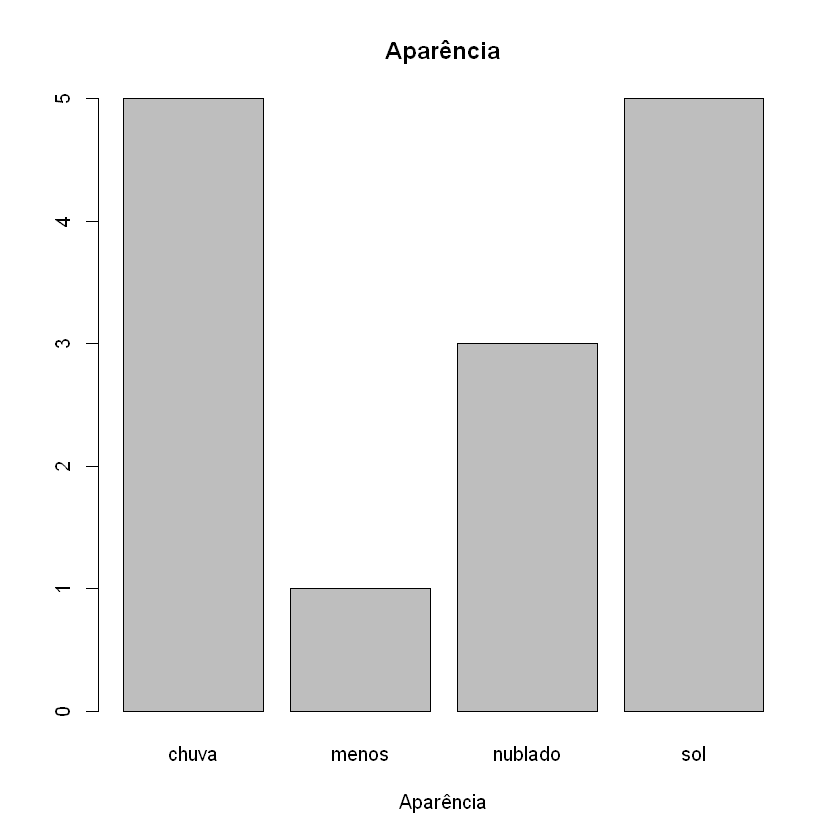

In [51]:
count = table(data$Aparencia)
barplot(count, main="Aparência", xlab="Aparência")

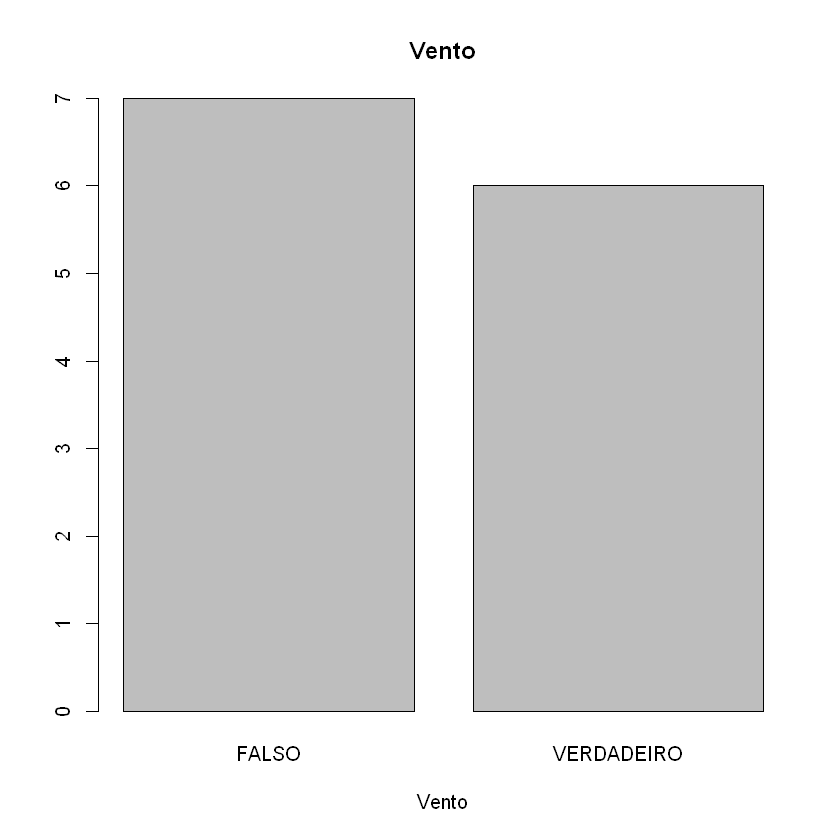

In [52]:
# Vento
count = table(data$Vento)
barplot(count, main="Vento", xlab="Vento")

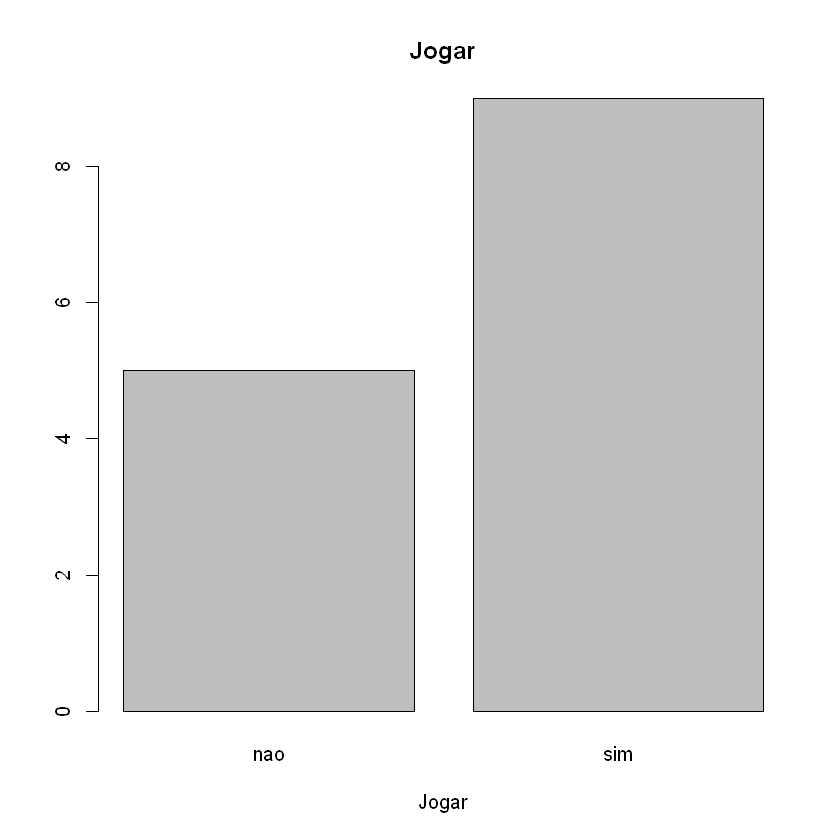

In [53]:
count = table(data$Jogar)
barplot(count,main='Jogar',xlab="Jogar")

In [54]:
summary(data$Temperatura)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  64.00   69.25   73.50  155.57   80.75 1220.00 

# Exploração
---
* Variáveis Quantitativas

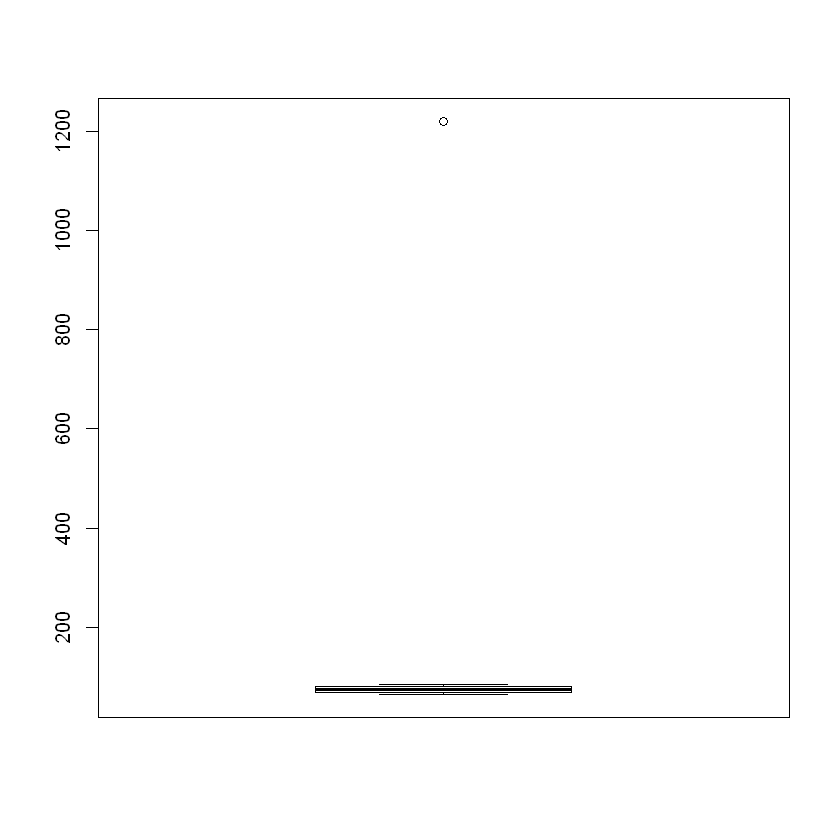

In [55]:
# Temperatura - -130 ~ 130 F
temperatura = data$Temperatura 
boxplot(temperatura)

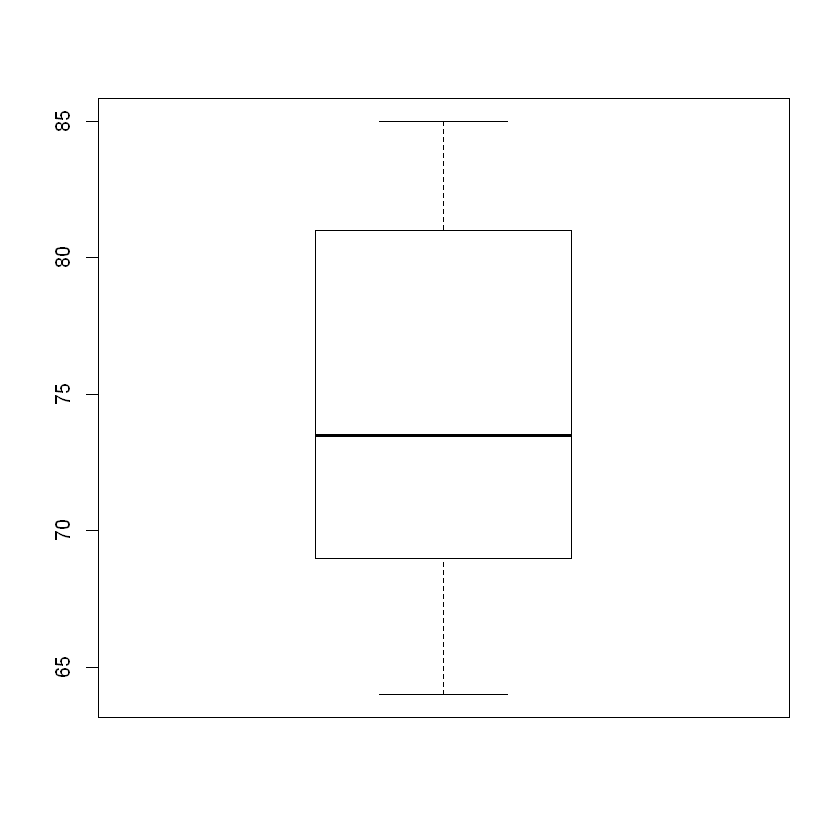

In [56]:
boxplot(temperatura, outline=F)

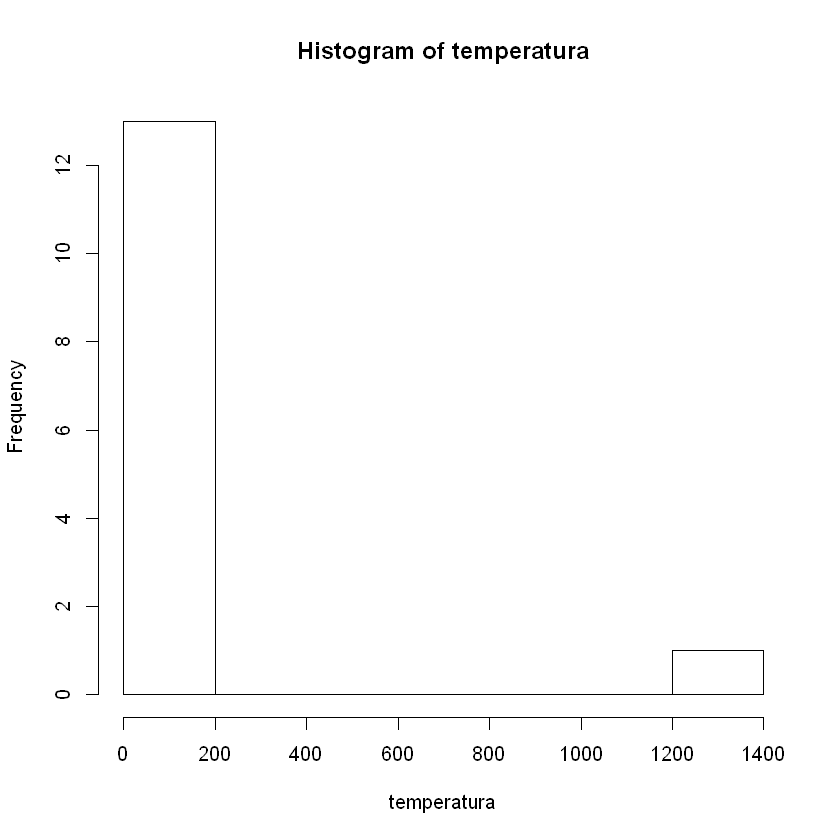

In [57]:
hist(temperatura)

In [58]:
# Umidade: 0 ~ 100
umidade = data$Umidade
summary(umidade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  65.00   70.00   85.00   89.77   90.00  200.00       1 

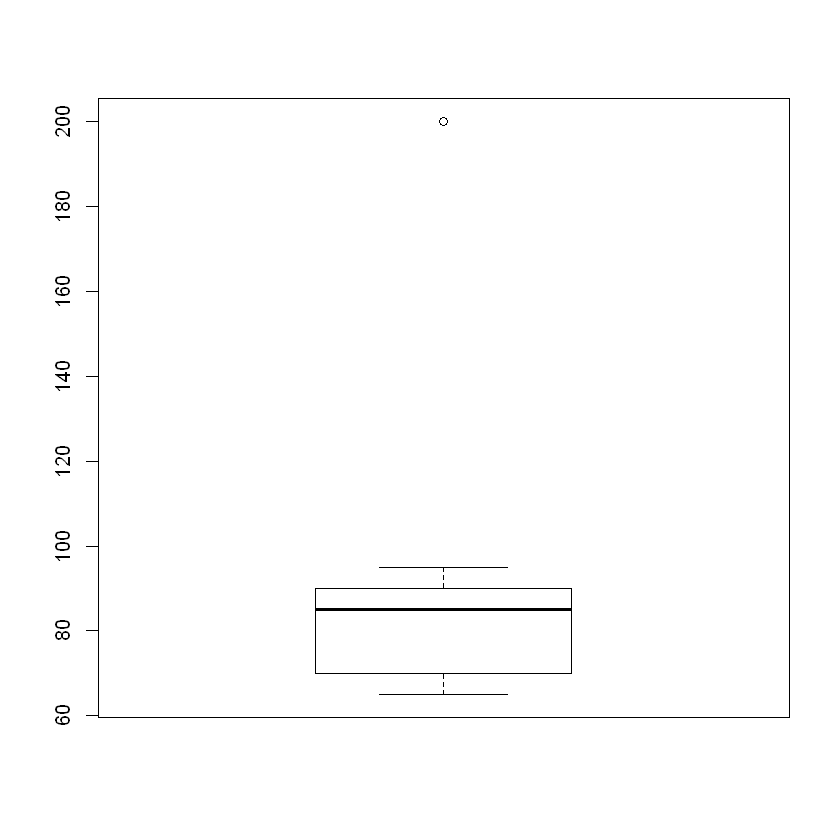

In [59]:
boxplot(umidade)

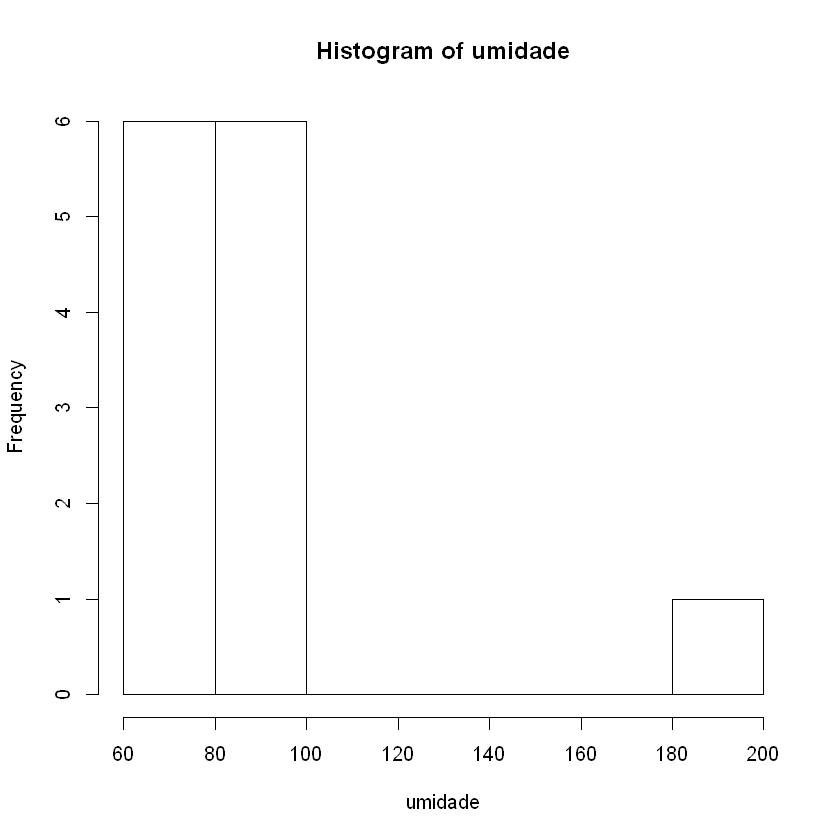

In [60]:
hist(umidade)

In [61]:
# Verificação de valores faltantes
data[!complete.cases(data),]

,Aparencia,Temperatura,Umidade,Vento,Jogar
4,chuva,70,NA,FALSO,sim
10,chuva,75,200,NA,sim


# Tratamento dos Dados
---

## Aparência
---
* Aparência: substituir por moda

In [62]:
## Não possui Na
summary(data$Aparencia)

chuva   menos nublado     sol 
      5       1       3       5

In [63]:
data[data$Aparencia == "menos",]$Aparencia = "sol"

In [64]:
summary(data$Aparencia)

chuva   menos nublado     sol 
      5       0       3       6

In [65]:
data$Aparencia = factor(data$Aparencia)

In [66]:
summary(data$Aparencia)

chuva nublado     sol 
      5       3       6

# Temperatura 
---
* fora de domínio (-130 ~ 130 F)
* Substituindo pela mediana

In [82]:
## Não possui Na
summary(data$Temperatura)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  64.00   69.25   72.75   73.68   78.75   85.00 

In [75]:
data[data$Temperatura < -130 | data$Temperatura > 130,]

,Aparencia,Temperatura,Umidade,Vento,Jogar
8,sol,1220,95,FALSO,nao


In [76]:
data[is.na(data$Temperatura),]

Aparencia,Temperatura,Umidade,Vento,Jogar


In [79]:
#mediana
m = median(data$Temperatura)
m

[1] 73.5

In [80]:
data[data$Temperatura < -130 | data$Temperatura > 130,]$Temperatura = m

In [81]:
summary(data$Temperatura)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  64.00   69.25   72.75   73.68   78.75   85.00 

# Umidade
---
* Fora de domínio: 0 ~ 100
* Exclusasão de Na's

In [83]:
summary(data$Umidade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  65.00   70.00   85.00   89.77   90.00  200.00       1 

In [92]:
m = median(data$Umidade, na.rm=T)
m

[1] 85

In [96]:
data[is.na(data$Umidade),]$Umidade = m

In [100]:
data$Umidade

[1]  85  90  86  85  80  70  65  95  70 200  70  90  75  91

In [101]:
data[data$Umidade < 0 | data$Umidade >100,]$Umidade = m

In [102]:
summary(data$Umidade)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  65.00   71.25   85.00   81.21   89.00   95.00 

# Vento
---
* Exclusasão de Na's

In [103]:
summary(data$Vento)

FALSO VERDADEIRO       NA's 
         7          6          1

In [110]:
data[is.na(data$Vento),]$Vento = 'FALSO'

In [111]:
summary(data$Vento)

FALSO VERDADEIRO 
         8          6